In [9]:
from astropy.io import ascii 
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import astropy.coordinates as coords
import pandas as pd

In [10]:
#Opening tables
home='/home/igonzalez/MAUCA/METEOR 3/Project_parallaxes/' 
raw_sample=pd.read_csv(home+'NGP 8deg sample.csv') #sample containing 573152 stars (NGP)
file2=home+'cross_match_25_05'
cross_match_CBJ=ascii.read(file2) #cross-match containing 100000 stars (NGP + CBJ)
#Columns with "_1" belong to the NGP sample selected through the cross-match
#Columns with "_2" belong to the CBJ sample used for the cross-match

In [11]:
raw_sample.drop(257561,0)

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat
0,1636042515805110273,Gaia EDR3 3961802667056331392,3961802667056331392,1547608550,2016.0,192.364122,1.929665,27.170031,1.789350,NaN,...,NaN,NaN,0,NaN,NaN,NaN,207.404060,89.557245,179.547668,29.651779
1,1636042515805110273,Gaia EDR3 3961802804494765440,3961802804494765440,384650693,2016.0,192.389631,0.560986,27.193292,0.441199,0.823848,...,NaN,NaN,0,NaN,NaN,NaN,203.981107,89.576933,179.559057,29.682731
2,1636042515805110273,Gaia EDR3 3961802834558679808,3961802834558679808,1296035021,2016.0,192.366053,7.089860,27.197543,3.871364,NaN,...,NaN,NaN,0,NaN,NaN,NaN,203.849771,89.555557,179.535277,29.677155
3,1636042515805110273,Gaia EDR3 3961802873214230784,3961802873214230784,725002825,2016.0,192.370084,0.505242,27.209544,0.422440,0.299085,...,NaN,NaN,0,NaN,NaN,NaN,202.244223,89.557078,179.532791,29.689492
4,1636042515805110273,Gaia EDR3 3961802971997632896,3961802971997632896,654504789,2016.0,192.319349,0.307064,27.194095,0.258427,0.781663,...,NaN,NaN,0,NaN,NaN,NaN,205.006933,89.514942,179.494292,29.655494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573147,1636042515805110273,Gaia EDR3 1449208792729344896,1449208792729344896,236219093,2016.0,201.822955,0.218312,27.245448,0.157222,1.450575,...,NaN,NaN,0,NaN,NaN,NaN,35.823321,82.027640,188.348734,33.469318
573148,1636042515805110273,Gaia EDR3 1449208934463535360,1449208934463535360,690921768,2016.0,201.773701,1.552794,27.246496,1.001553,-0.864710,...,NaN,NaN,0,NaN,NaN,NaN,35.824273,82.071442,188.301113,33.450872
573149,1636042515805110273,Gaia EDR3 1449208968823672832,1449208968823672832,1329109588,2016.0,201.800117,0.295437,27.253291,0.216995,1.784977,...,NaN,NaN,0,NaN,NaN,NaN,35.876915,82.048100,188.322747,33.467362
573150,1636042515805110273,Gaia EDR3 1449209033247515648,1449209033247515648,8035784,2016.0,201.786961,0.087422,27.253479,0.065752,1.567957,...,NaN,NaN,0,NaN,NaN,NaN,35.876583,82.059797,188.310077,33.462352


In [12]:
#Headers of the cross-match
print(cross_match_CBJ[1])

    solution_id              designation              source_id_1     random_index_1 ref_epoch        ra_1        ra_error_1       dec_1       dec_error_1     parallax_1     parallax_error_1 parallax_over_error     pm          pmra_1       pmra_error_1      pmdec_1       pmdec_error_1 ra_dec_corr  ra_parallax_corr ra_pmra_corr ra_pmdec_corr dec_parallax_corr dec_pmra_corr dec_pmdec_corr parallax_pmra_corr parallax_pmdec_corr pmra_pmdec_corr astrometric_n_obs_al astrometric_n_obs_ac astrometric_n_good_obs_al astrometric_n_bad_obs_al astrometric_gof_al astrometric_chi2_al astrometric_excess_noise_1 astrometric_excess_noise_sig astrometric_params_solved_1 astrometric_primary_flag nu_eff_used_in_astrometry pseudocolour_1 pseudocolour_error ra_pseudocolour_corr dec_pseudocolour_corr parallax_pseudocolour_corr pmra_pseudocolour_corr pmdec_pseudocolour_corr astrometric_matched_transits visibility_periods_used astrometric_sigma5d_max matched_transits new_matched_transits matched_transits_remov

In [36]:
#Parameters

#NGP original data

plx_NGP=np.array(raw_sample['parallax'])        
plx__NGP=np.array(raw_sample['parallax'][plx_NGP>0]) #I select the parallaxes that are >0 : 374015 stars left
dist_NGP=1/plx__NGP
plx_error_NGP=np.array(raw_sample['parallax_error'][plx_NGP>0])
ruwe_NGP=np.array(raw_sample['ruwe'][plx_NGP>0]) #RUWE is the same for NGP and CBJ data
l_NGP=np.array(raw_sample['l'][plx_NGP>0])
b_NGP=np.array(raw_sample['b'][plx_NGP>0]) 
ra_NGP=np.array(raw_sample['ra'][plx_NGP>0])
dec_NGP=np.array(raw_sample['dec'][plx_NGP>0])
pmra_NGP=np.array(raw_sample['pmra'][plx_NGP>0])
pmdec_NGP=np.array(raw_sample['pmdec'][plx_NGP>0])
Vrad_NGP=np.array(raw_sample['dr2_radial_velocity'][plx_NGP>0])

#CBJ data
dist_geo_CBJ=np.array(cross_match_CBJ['r_med_geo'])/1E3 #CBJ geometric distance in kpc
dist_photogeo_CBJ= np.array(cross_match_CBJ['r_med_photogeo'])/1E3 #CBJ photogeometric distance
r_hi_geo=np.array(cross_match_CBJ['r_hi_geo'])/1E3
r_lo_geo=np.array(cross_match_CBJ['r_lo_geo'])/1E3
r_hi_photogeo=np.array(cross_match_CBJ['r_hi_photogeo'])/1E3
r_lo_photogeo=np.array(cross_match_CBJ['r_lo_photogeo'])/1E3
flag=np.array(cross_match_CBJ['flag'])

#Refined NGP data
plx_refined_NGP=np.array(cross_match_CBJ['parallax_1']) 
#plx__refined_NGP=np.array(cross_match_CBJ['parallax_1'][plx_refined_NGP>0])
plx_error_refined_NGP=np.array(cross_match_CBJ['parallax_error_1'])
ruwe_refined_NGP=np.array(cross_match_CBJ['ruwe_1']) 
l_refined_NGP=np.array(cross_match_CBJ['l'])
b_refined_NGP=np.array(cross_match_CBJ['b']) 
ra_refined_NGP=np.array(cross_match_CBJ['ra_1'])
dec_refined_NGP=np.array(cross_match_CBJ['dec_1'])
pmra_refined_NGP=np.array(cross_match_CBJ['pmra_1'])
pmdec_refined_NGP=np.array(cross_match_CBJ['pmdec_1'])
Vrad_refined_NGP=np.array(cross_match_CBJ['dr2_radial_velocity_1'])

In [14]:
#Constants
Rsun=8.178  # kpc (Gravity Collaboration et al. 2019)
Zsun=0.0208 # kpc (Bennett & Bovy 2019)
Usun=11.1  # km/s (Schönrich et al. 2010; Reid & Brunthaler2020)
Vsun=12.24 # km/s (Schoenrich 2012)
Wsun=7.25  # km/s (Schönrich et al. 2010; Reid & Brunthaler2020)
V_LSR=240.0 # km/s (Reid et al. 2014)
VsunPlusV_LSR = Vsun+V_LSR
VsunPlusV_LSR = 248.5 # km/s (Schönrich et al. 2010; Reid & Brunthaler2020)
VitesseSun = coords.CartesianDifferential([Usun,VsunPlusV_LSR,Wsun]*u.km/u.s) 

In [38]:
#Velocities
v_NGP =coords.SkyCoord(ra=ra_NGP*u.degree, dec=dec_NGP*u.degree, distance=dist_NGP*u.kpc, pm_ra_cosdec=pmra_NGP*u.mas/u.yr, pm_dec=pmdec_NGP*u.mas/u.yr, radial_velocity=Vrad_NGP*u.km/u.s, frame='icrs')
v_CBJ=coords.SkyCoord(ra=ra_refined_NGP*u.degree, dec=dec_refined_NGP*u.degree, distance=dist_geo_CBJ*u.kpc, pm_ra_cosdec=pmra_refined_NGP*u.mas/u.yr, pm_dec=pmdec_refined_NGP*u.mas/u.yr, radial_velocity=Vrad_refined_NGP*u.km/u.s, frame='icrs')
GalacticCenter_Réf = coords.Galactocentric(galcen_distance=Rsun*u.kpc, z_sun=Zsun*u.kpc, galcen_v_sun=VitesseSun)
cg1=v_NGP.transform_to(GalacticCenter_Réf)
cg1.representation_type='cartesian'
U_NGP=-cg1.v_x.value 
V_NGP=cg1.v_y.value
W_NGP=cg1.v_z.value
cg2=v_CBJ.transform_to(GalacticCenter_Réf)
cg2.representation_type='cartesian'
U_geo_CBJ=-cg2.v_x.value 
V_geo_CBJ=cg2.v_y.value
W_geo_CBJ=cg2.v_z.value

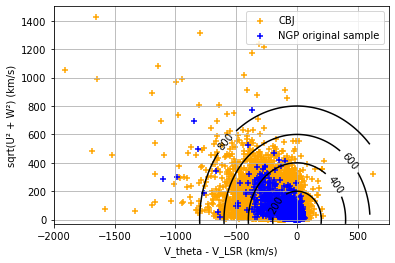

In [63]:
#Toomre diagram: NGP VS CBJ
plt.grid()
x = np.arange(-2000,600,1)
y = np.arange(-30,1400,1)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
levels = [200.,400.,600.,800.]

Tx_NGP=V_NGP-V_LSR
Ty_NGP=np.sqrt(U_NGP**2+W_NGP**2)
Tx_CBJ=V_geo_CBJ-V_LSR
Ty_CBJ=np.sqrt(U_geo_CBJ**2+W_geo_CBJ**2)


plt.scatter(Tx_CBJ,Ty_CBJ,marker='+',color='orange',label='CBJ')
plt.scatter(Tx_NGP,Ty_NGP,marker='+',color='blue',label='NGP original sample')

plt.xlabel('V_theta - V_LSR (km/s)')
plt.ylabel('sqrt(U² + W²) (km/s)')
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.0f', fontsize=10)
plt.legend(loc='best')

In [40]:
#Coordinates for spatial distributions plots
X_NGP=dist_NGP*np.cos(b_NGP)*np.cos(l_NGP) + Rsun
Y_NGP=dist_NGP*np.cos(b_NGP)*np.sin(l_NGP)
Z_NGP=dist_NGP*np.sin(b_NGP)
R_NGP=(X_NGP**2+Y_NGP**2)**1/2

X_CBJ=dist_geo_CBJ*np.cos(b_refined_NGP)*np.cos(l_refined_NGP)+ Rsun
Y_CBJ=dist_geo_CBJ*np.cos(b_refined_NGP)*np.sin(l_refined_NGP)
Z_CBJ=dist_geo_CBJ*np.sin(b_refined_NGP)
R_CBJ= (X_CBJ**2+Y_CBJ**2)**1/2 

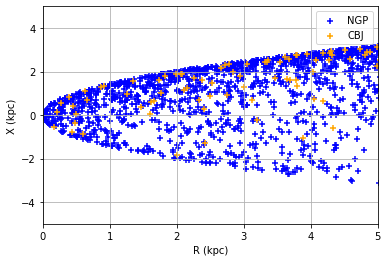

In [41]:
# X VS R: NGP VS CBJ
plt.grid()
plt.scatter(R_NGP,X_NGP,color='blue',marker='+',label='NGP')
plt.scatter(R_CBJ,X_CBJ,color='orange',marker='+',label='CBJ')
plt.ylim(-5,5)
plt.xlim(0,5)
plt.xlabel('R (kpc)')
plt.ylabel('X (kpc)')
plt.legend(loc='best')

#dpi : densité pixels 
#alpha: entre 0 et 1 (opacité)

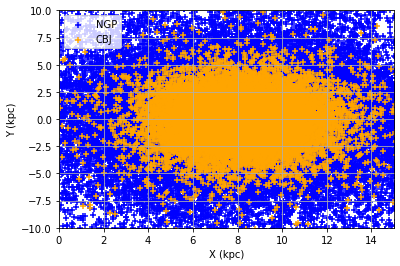

In [42]:
#Spatial distribution 2D: Y VS X, NGP VS CBJ

plt.grid()
plt.scatter(X_NGP,Y_NGP,color='blue',marker='+',label='NGP')
plt.scatter(X_CBJ,Y_CBJ,color='orange',marker='+',label='CBJ')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.legend(loc='best')

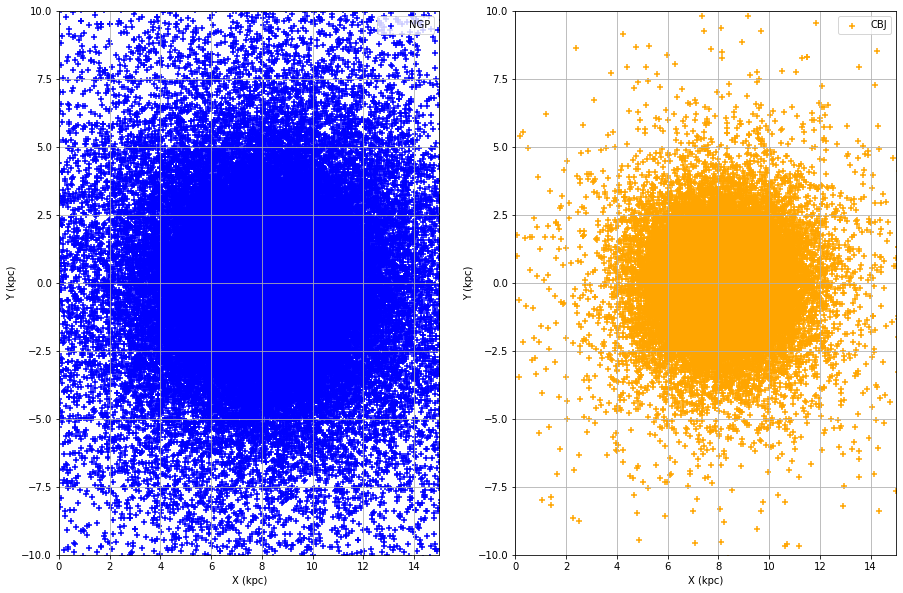

In [43]:
#Spatial distribution 2D: Y VS X, NGP VS CBJ
plt.figure(1,figsize=(15,10))

plt.subplot(121)
plt.grid()
plt.scatter(X_NGP,Y_NGP,color='blue',marker='+',label='NGP')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.grid()
plt.scatter(X_CBJ,Y_CBJ,color='orange',marker='+',label='CBJ')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.legend(loc='upper right')

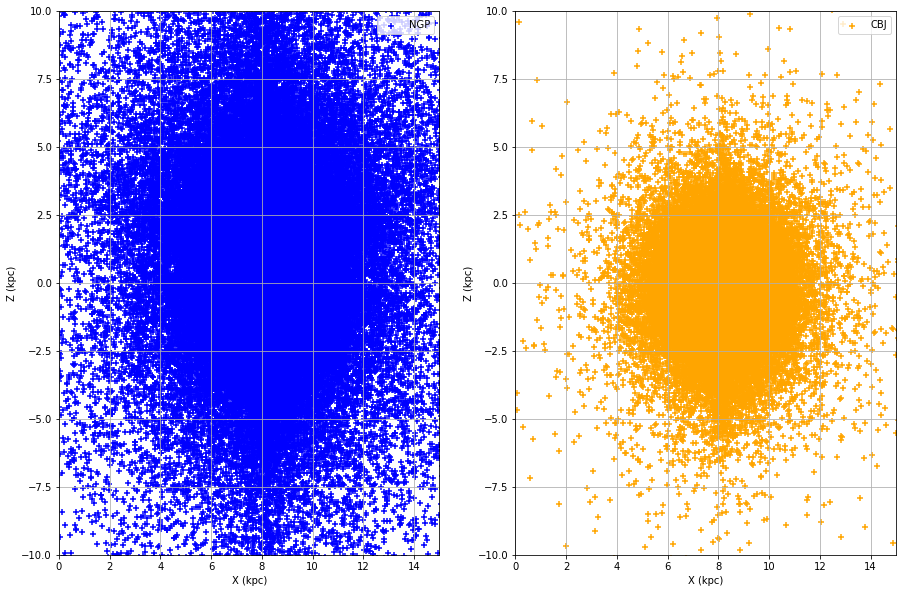

In [44]:
#Spatial distribution 2D: Z VS X, NGP VS CBJ
plt.figure(1,figsize=(15,10))

plt.subplot(121)
plt.grid()
plt.scatter(X_NGP,Z_NGP,color='blue',marker='+',label='NGP')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.xlabel('X (kpc)')
plt.ylabel('Z (kpc)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.grid()
plt.scatter(X_CBJ,Z_CBJ,color='orange',marker='+',label='CBJ')
plt.xlabel('X (kpc)')
plt.ylabel('Z (kpc)')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.legend(loc='upper right')

Text(0, 0.5, 'Error on the NGP distance (kpc)')

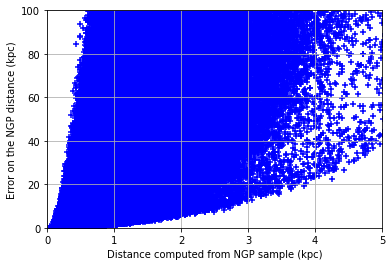

In [45]:
#Error on distances: NGP original sample
dist_error_NGP=(plx_error_NGP/(plx__NGP)**2)*100
plt.grid()
plt.scatter(dist_NGP,dist_error_NGP,marker='+',color='blue')
plt.ylim(0,100)
plt.xlim(0,5)
plt.xlabel('Distance computed from NGP sample (kpc)')
plt.ylabel('Error on the NGP distance (kpc)')

Text(0, 0.5, 'Error on the geometric distance (kpc)')

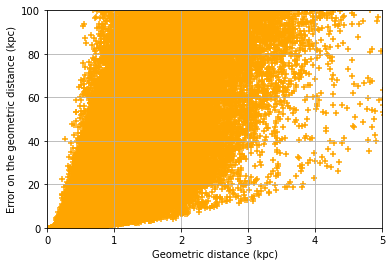

In [46]:
#Errors on geometric distances: CBJ 
dist_error_geo_CBJ=((r_hi_geo-r_lo_geo)/2)*100
plt.grid()
plt.scatter(dist_geo_CBJ,dist_error_geo_CBJ,marker='+',color='orange')
plt.ylim(0,100)
plt.xlim(0,5)
plt.xlabel('Geometric distance (kpc)')
plt.ylabel('Error on the geometric distance (kpc)')

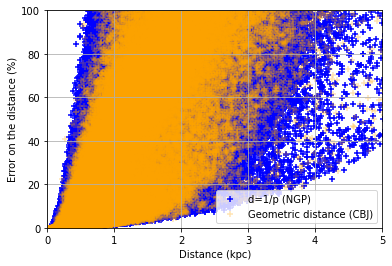

In [47]:
#Error on distances: NGP original sample vs CBJ
plt.grid()
plt.scatter(dist_NGP,dist_error_NGP,marker='+',color='blue',label='d=1/p (NGP)')
plt.scatter(dist_geo_CBJ,dist_error_geo_CBJ,marker='+',color='orange',label='Geometric distance (CBJ)',alpha=0.3)
plt.ylim(0,100)
plt.xlim(0,5)
plt.xlabel('Distance (kpc)')
plt.ylabel('Error on the distance (%)')
plt.legend(loc='best')

Text(0, 0.5, 'CBJ photogeometric distance (kpc)')

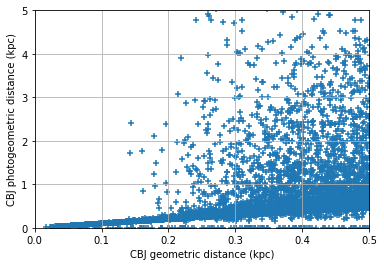

In [48]:
#Concordance of the results between photogeometric and geometric distance
plt.grid()
plt.ylim(0,5)
plt.xlim(0,0.5)
plt.scatter(dist_geo_CBJ,dist_photogeo_CBJ,marker='+')
plt.xlabel('CBJ geometric distance (kpc)')
plt.ylabel('CBJ photogeometric distance (kpc)')

Text(0, 0.5, 'Relative error between geometric and photogeometric distances (%)')

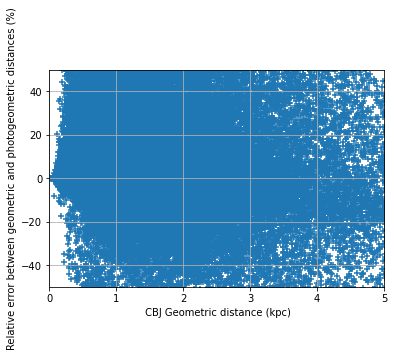

In [49]:
dist_error_prior = ((dist_photogeo_CBJ - dist_geo_CBJ)/dist_geo_CBJ)*100
plt.grid()
plt.ylim(-50,50)
plt.xlim(0,5)
plt.scatter(dist_geo_CBJ,dist_error_prior,marker='+')
plt.xlabel(' CBJ Geometric distance (kpc)')
plt.ylabel('Relative error between geometric and photogeometric distances (%)')

Text(0, 0.5, 'Relative error on distances (%)')

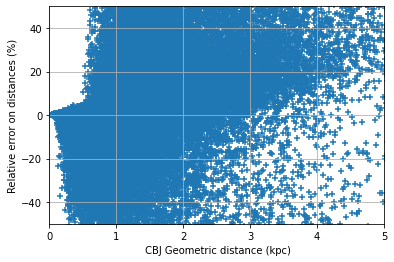

In [50]:
#Graph relative error on distances VS CBJ geometric distance using refined NGP sample
dist_refined_NGP=1/plx_refined_NGP
dist_error_refined = ((dist_refined_NGP - dist_geo_CBJ)/dist_geo_CBJ)*100
plt.grid()
plt.ylim(-50,50)
plt.xlim(0,5)
plt.scatter(dist_geo_CBJ,dist_error_refined,marker='+')
plt.xlabel(' CBJ Geometric distance (kpc)')
plt.ylabel('Relative error on distances (%)')

<ipython-input-51-af7b7e9f7220>:2: RuntimeWarning: divide by zero encountered in true_divide
  dist_error_photo = ((dist_refined_NGP - dist_photogeo_CBJ)/dist_photogeo_CBJ)*100


Text(0, 0.5, 'Relative error on distances (%)')

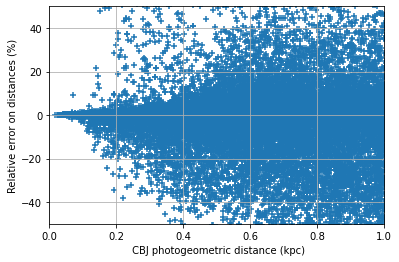

In [51]:
#Graph relative error on distances VS CBJ geometric distance using refined NGP sample
dist_error_photo = ((dist_refined_NGP - dist_photogeo_CBJ)/dist_photogeo_CBJ)*100
plt.grid()
plt.ylim(-50,50)
plt.xlim(0,1)
plt.scatter(dist_photogeo_CBJ,dist_error_photo,marker='+')
plt.xlabel(' CBJ photogeometric distance (kpc)')
plt.ylabel('Relative error on distances (%)')

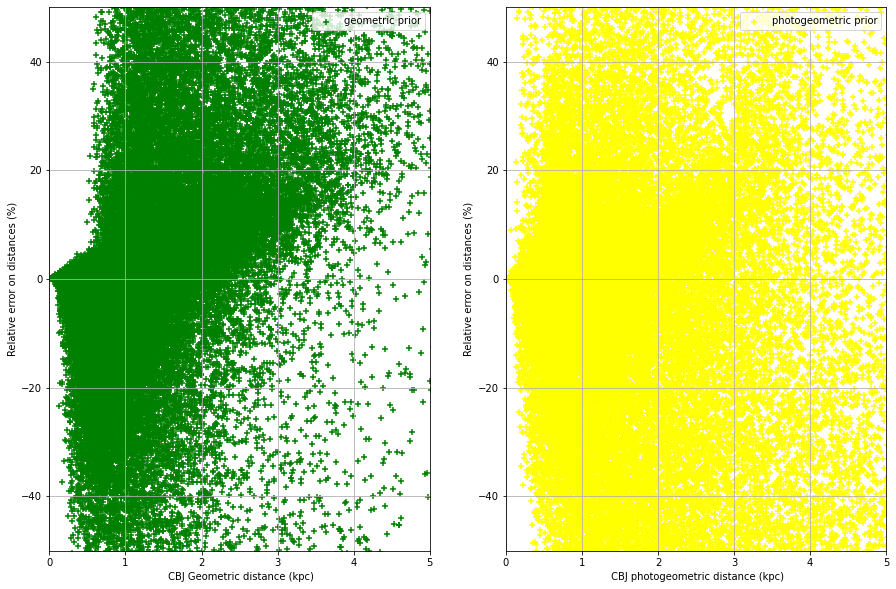

In [52]:
#error on large scale, NGP VS CBJ
plt.figure(1,figsize=(15,10))

plt.subplot(121)
plt.grid()
plt.scatter(dist_geo_CBJ,dist_error_refined,color='green',marker='+',label='geometric prior')
plt.xlabel(' CBJ Geometric distance (kpc)')
plt.ylabel('Relative error on distances (%)')
plt.ylim(-50,50)
plt.xlim(0,5)

plt.legend(loc='upper right')

plt.subplot(122)
plt.grid()
plt.scatter(dist_photogeo_CBJ,dist_error_photo,color='yellow',marker='+',label='photogeometric prior')
plt.xlabel(' CBJ photogeometric distance (kpc)')
plt.ylabel('Relative error on distances (%)')
plt.ylim(-50,50)
plt.xlim(0,5)
plt.legend(loc='upper right')

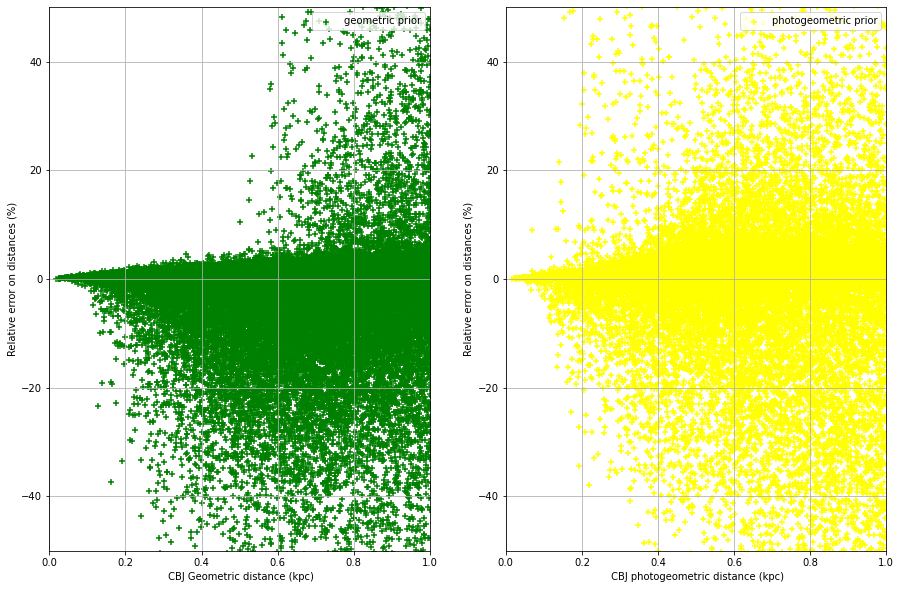

In [53]:
plt.figure(1,figsize=(15,10))
plt.subplot(121)
plt.grid()
plt.scatter(dist_geo_CBJ,dist_error_refined,color='green',marker='+',label='geometric prior')
plt.xlabel(' CBJ Geometric distance (kpc)')
plt.ylabel('Relative error on distances (%)')
plt.ylim(-50,50)
plt.xlim(0,1)

plt.legend(loc='upper right')

plt.subplot(122)
plt.grid()
plt.scatter(dist_photogeo_CBJ,dist_error_photo,color='yellow',marker='+',label='photogeometric prior')
plt.xlabel(' CBJ photogeometric distance (kpc)')
plt.ylabel('Relative error on distances (%)')
plt.ylim(-50,50)
plt.xlim(0,1)
plt.legend(loc='upper right')

In [23]:
#Quality cut 1: RUWE < 1

#Refined NGP data
ruwe_low_NGP=ruwe_refined_NGP[ruwe_refined_NGP<1] 
plx_low_NGP=plx__refined_NGP[ruwe_refined_NGP<1]
plx__low_NGP=plx_low_NGP[plx_low_NGP>0]
plx_error_low_NGP=plx_error_refined_NGP[ruwe_refined_NGP<1][plx_low_NGP>0]
dist_low_NGP=1/plx_low_NGP[plx_low_NGP>0]

l_low_NGP=l_refined_NGP[ruwe_refined_NGP<1][plx_low_NGP>0]
b_low_NGP=b_refined_NGP[ruwe_refined_NGP<1][plx_low_NGP>0]
ra_low_NGP=ra_refined_NGP[ruwe_refined_NGP<1][plx_low_NGP>0]
dec_low_NGP=dec_refined_NGP[ruwe_refined_NGP<1][plx_low_NGP>0]
pmra_low_NGP=pmra_refined_NGP[ruwe_refined_NGP<1][plx_low_NGP>0]
pmdec_low_NGP=pmdec_refined_NGP[ruwe_refined_NGP<1][plx_low_NGP>0]
Vrad_low_NGP=Vrad_refined_NGP[ruwe_refined_NGP<1][plx_low_NGP>0]


#CBJ data
dist_geo_low_CBJ=dist_geo_CBJ[plx_refined_NGP>0][ruwe_refined_NGP<1]
dist_photogeo_low_CBJ= dist_photogeo_CBJ[plx_refined_NGP>0][ruwe_refined_NGP<1]
r_hi_low_geo=r_hi_geo[plx_refined_NGP>0][ruwe_refined_NGP<1]
r_lo_low_geo=r_lo_geo[plx_refined_NGP>0][ruwe_refined_NGP<1]
r_hi_low_photogeo=r_hi_photogeo[plx_refined_NGP>0][ruwe_refined_NGP<1]
r_lo_low_photogeo=r_lo_photogeo[plx_refined_NGP>0][ruwe_refined_NGP<1]

#Velocities
v_low_NGP =coords.SkyCoord(ra=ra_low_NGP*u.degree, dec=dec_low_NGP*u.degree, distance=dist_low_NGP*u.kpc, pm_ra_cosdec=pmra_low_NGP*u.mas/u.yr, pm_dec=pmdec_low_NGP*u.mas/u.yr, radial_velocity=Vrad_low_NGP*u.km/u.s, frame='icrs')
v_low_CBJ= coords.SkyCoord(ra=ra_low_NGP*u.degree, dec=dec_low_NGP*u.degree, distance=dist_geo_low_CBJ*u.kpc, pm_ra_cosdec=pmra_low_NGP*u.mas/u.yr, pm_dec=pmdec_low_NGP*u.mas/u.yr, radial_velocity=Vrad_low_NGP*u.km/u.s, frame='icrs')
GalacticCenter_Réf = coords.Galactocentric(galcen_distance=Rsun*u.kpc, z_sun=Zsun*u.kpc, galcen_v_sun=VitesseSun)
cg3=v_low_NGP.transform_to(GalacticCenter_Réf)
cg3.representation_type='cartesian'
U_low_NGP=-cg3.v_x.value 
V_low_NGP=cg3.v_y.value
W_low_NGP=cg3.v_z.value
cg4=v_low_CBJ.transform_to(GalacticCenter_Réf)
cg4.representation_type='cartesian'
U_geo_low_CBJ=-cg4.v_x.value 
V_geo_low_CBJ=cg4.v_y.value
W_geo_low_CBJ=cg4.v_z.value

In [60]:
print((len(l_low_NGP)/len(l_NGP))*100)

8.414635776639974


In [61]:
print(len(l_low_NGP))

31472


In [24]:
#Coordinates for spatial distributions plots
X_low_NGP=dist_low_NGP*np.cos(b_low_NGP)*np.cos(l_low_NGP) + Rsun
Y_low_NGP=dist_low_NGP*np.cos(b_low_NGP)*np.sin(l_low_NGP)
Z_low_NGP=dist_low_NGP*np.sin(b_low_NGP)
R_low_NGP=(X_low_NGP**2+Y_low_NGP**2)**1/2

X_low_CBJ=dist_geo_low_CBJ*np.cos(b_low_NGP)*np.cos(l_low_NGP)+ Rsun
Y_low_CBJ=dist_geo_low_CBJ*np.cos(b_low_NGP)*np.sin(l_low_NGP)
Z_low_CBJ=dist_geo_low_CBJ*np.sin(b_low_NGP)
R_low_CBJ= (X_low_CBJ**2+Y_low_CBJ**2)**1/2 

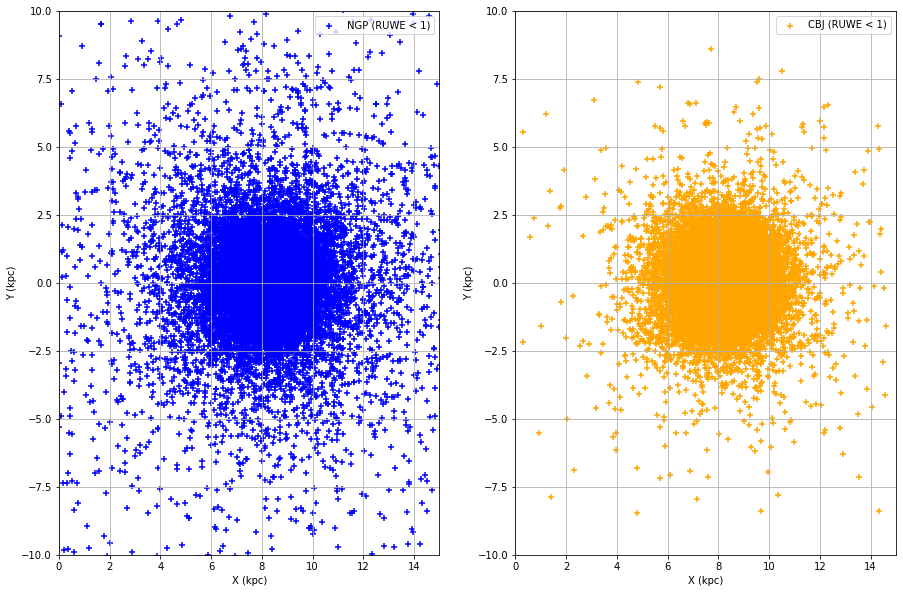

In [25]:
#Spatial distribution 2D with RUWE <1: Y VS X, NGP VS CBJ
plt.figure(1,figsize=(15,10))

plt.subplot(121)
plt.grid()
plt.scatter(X_low_NGP,Y_low_NGP,color='blue',marker='+',label='NGP (RUWE < 1)')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.grid()
plt.scatter(X_low_CBJ,Y_low_CBJ,color='orange',marker='+',label='CBJ (RUWE < 1)')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.legend(loc='upper right')

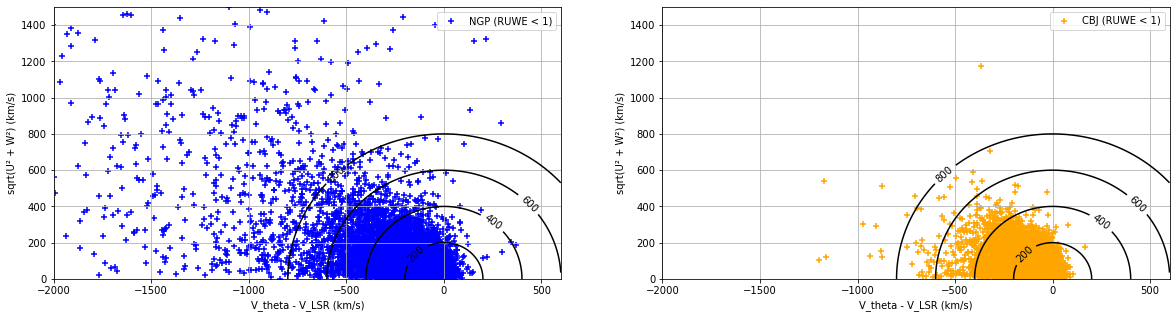

In [26]:
#Toomre diagram with RUWE <1: NGP VS CBJ

plt.figure(1,figsize=(20,5))

plt.subplot(121)
plt.grid()
x = np.arange(-2000,600,1)
y = np.arange(-30,1400,1)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
levels = [200.,400.,600.,800.]

Tx_low_NGP=V_low_NGP-V_LSR
Ty_low_NGP=np.sqrt(U_low_NGP**2+W_low_NGP**2)
Tx_low_CBJ=V_geo_low_CBJ-V_LSR
Ty_low_CBJ=np.sqrt(U_geo_low_CBJ**2+W_geo_low_CBJ**2)


plt.scatter(Tx_low_NGP,Ty_low_NGP,marker='+',color='blue',label='NGP (RUWE < 1)')
plt.ylim(0,1500)
plt.xlim(-2000,600)
plt.xlabel('V_theta - V_LSR (km/s)')
plt.ylabel('sqrt(U² + W²) (km/s)')
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.0f', fontsize=10)
plt.legend(loc='best')

plt.subplot(122)
plt.grid()
x = np.arange(-2000,600,1)
y = np.arange(-30,1400,1)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
levels = [200.,400.,600.,800.]
plt.scatter(Tx_low_CBJ,Ty_low_CBJ,marker='+',color='orange',label='CBJ (RUWE < 1)')
plt.ylim(0,1500)
plt.xlim(-2000,600)
plt.xlabel('V_theta - V_LSR (km/s)')
plt.ylabel('sqrt(U² + W²) (km/s)')
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.0f', fontsize=10)
plt.legend(loc='best')

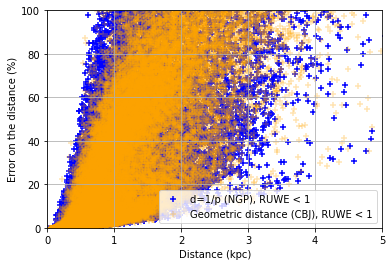

In [27]:
#Error on distances with RUWE < 1: NGP original sample vs CBJ
plt.grid()
dist_error_low_NGP=(plx_error_low_NGP/(plx__low_NGP)**2)*100
dist_error_geo_low_CBJ=((r_hi_low_geo-r_lo_low_geo)/2)*100
plt.scatter(dist_low_NGP,dist_error_low_NGP,marker='+',color='blue',label='d=1/p (NGP), RUWE < 1')
plt.scatter(dist_geo_low_CBJ,dist_error_geo_low_CBJ,marker='+',color='orange',label='Geometric distance (CBJ), RUWE < 1',alpha=0.3)
plt.ylim(0,100)
plt.xlim(0,5)
plt.xlabel('Distance (kpc)')
plt.ylabel('Error on the distance (%)')
plt.legend(loc='best')

In [28]:
#for this dataset ruwe is < 0.9
file3=home+'data_NGP_fidelity_3814'
data_NGP_fid=ascii.read(file3)
file4=home+'cross_match_CBJ_fidelity'
cross_match_CBJ_fid=ascii.read(file4)

In [29]:
plx_NGP_f=np.array(cross_match_CBJ_fid['parallax_1']) 
fid_NGP=np.array(cross_match_CBJ_fid['fidelity_v1'][plx_NGP_f>0])
plx__NGP_f=np.array(cross_match_CBJ_fid['parallax_1'][plx_NGP_f>0]) 
dist_NGP_f=1/plx__NGP_f
plx_error_NGP_f=np.array(cross_match_CBJ_fid['parallax_error_1'][plx_NGP_f>0])
l_NGP_f=np.array(cross_match_CBJ_fid['l'][plx_NGP_f>0])
b_NGP_f=np.array(cross_match_CBJ_fid['b'][plx_NGP_f>0]) 
ra_NGP_f=np.array(cross_match_CBJ_fid['ra_1'][plx_NGP_f>0])
dec_NGP_f=np.array(cross_match_CBJ_fid['dec_1'][plx_NGP_f>0])
pmra_NGP_f=np.array(cross_match_CBJ_fid['pmra_1'][plx_NGP_f>0])
pmdec_NGP_f=np.array(cross_match_CBJ_fid['pmdec_1'][plx_NGP_f>0])
Vrad_NGP_f=np.array(cross_match_CBJ_fid['dr2_radial_velocity_1'][plx_NGP_f>0])

#CBJ data
dist_geo_CBJ_f=np.array(cross_match_CBJ_fid['r_med_geo'][plx_NGP_f>0])/1E3 #CBJ geometric distance in kpc
dist_photogeo_CBJ_f= np.array(cross_match_CBJ_fid['r_med_photogeo'][plx_NGP_f>0])/1E3 #CBJ photogeometric distance
r_hi_geo_f=np.array(cross_match_CBJ_fid['r_hi_geo'][plx_NGP_f>0])/1E3
r_lo_geo_f=np.array(cross_match_CBJ_fid['r_lo_geo'][plx_NGP_f>0])/1E3
r_hi_photogeo_f=np.array(cross_match_CBJ_fid['r_hi_photogeo'][plx_NGP_f>0])/1E3
r_lo_photogeo_f=np.array(cross_match_CBJ_fid['r_lo_photogeo'][plx_NGP_f>0])/1E3

In [30]:
#Quality cut 2: fidelity > 0.5

#Refined NGP data

plx_fid_NGP=plx__NGP_f[fid_NGP>0.5]
plx_error_fid_NGP=plx_error_NGP_f[fid_NGP>0.5]
dist_fid_NGP=1/plx_fid_NGP

l_fid_NGP=l_NGP_f[fid_NGP>0.5]
b_fid_NGP=b_NGP_f[fid_NGP>0.5]
ra_fid_NGP=ra_NGP_f[fid_NGP>0.5]
dec_fid_NGP=dec_NGP_f[fid_NGP>0.5]
pmra_fid_NGP=pmra_NGP_f[fid_NGP>0.5]
pmdec_fid_NGP=pmdec_NGP_f[fid_NGP>0.5]
Vrad_fid_NGP=Vrad_NGP_f[fid_NGP>0.5]


#CBJ data
dist_geo_fid_CBJ=dist_geo_CBJ_f[fid_NGP>0.5]
dist_photogeo_fid_CBJ= dist_photogeo_CBJ_f[fid_NGP>0.5]
r_hi_fid_geo=r_hi_geo_f[fid_NGP>0.5]
r_lo_fid_geo=r_lo_geo_f[fid_NGP>0.5]
r_hi_fid_photogeo=r_hi_photogeo_f[fid_NGP>0.5]
r_lo_fid_photogeo=r_lo_photogeo_f[fid_NGP>0.5]

#Velocities
v_fid_NGP =coords.SkyCoord(ra=ra_fid_NGP*u.degree, dec=dec_fid_NGP*u.degree, distance=dist_fid_NGP*u.kpc, pm_ra_cosdec=pmra_fid_NGP*u.mas/u.yr, pm_dec=pmdec_fid_NGP*u.mas/u.yr, radial_velocity=Vrad_fid_NGP*u.km/u.s, frame='icrs')
v_fid_CBJ= coords.SkyCoord(ra=ra_fid_NGP*u.degree, dec=dec_fid_NGP*u.degree, distance=dist_geo_fid_CBJ*u.kpc, pm_ra_cosdec=pmra_fid_NGP*u.mas/u.yr, pm_dec=pmdec_fid_NGP*u.mas/u.yr, radial_velocity=Vrad_fid_NGP*u.km/u.s, frame='icrs')
GalacticCenter_Réf = coords.Galactocentric(galcen_distance=Rsun*u.kpc, z_sun=Zsun*u.kpc, galcen_v_sun=VitesseSun)
cg5=v_fid_NGP.transform_to(GalacticCenter_Réf)
cg5.representation_type='cartesian'
U_fid_NGP=-cg5.v_x.value 
V_fid_NGP=cg5.v_y.value
W_fid_NGP=cg5.v_z.value
cg6=v_fid_CBJ.transform_to(GalacticCenter_Réf)
cg6.representation_type='cartesian'
U_geo_fid_CBJ=-cg6.v_x.value 
V_geo_fid_CBJ=cg6.v_y.value
W_geo_fid_CBJ=cg6.v_z.value

In [66]:
print((len(plx_NGP_f)/len(l_NGP))*100)

0.2117562129861102


In [67]:
print(len(plx_NGP_f))

792


In [31]:
#Coordinates for spatial distributions plots: fidelity >0.5
X_fid_NGP=dist_fid_NGP*np.cos(b_fid_NGP)*np.cos(l_fid_NGP) + Rsun
Y_fid_NGP=dist_fid_NGP*np.cos(b_fid_NGP)*np.sin(l_fid_NGP)
Z_fid_NGP=dist_fid_NGP*np.sin(b_fid_NGP)
R_fid_NGP=(X_fid_NGP**2+Y_fid_NGP**2)**1/2

X_fid_CBJ=dist_geo_fid_CBJ*np.cos(b_fid_NGP)*np.cos(l_fid_NGP)+ Rsun
Y_fid_CBJ=dist_geo_fid_CBJ*np.cos(b_fid_NGP)*np.sin(l_fid_NGP)
Z_fid_CBJ=dist_geo_fid_CBJ*np.sin(b_fid_NGP)
R_fid_CBJ= (X_fid_CBJ**2+Y_fid_CBJ**2)**1/2 

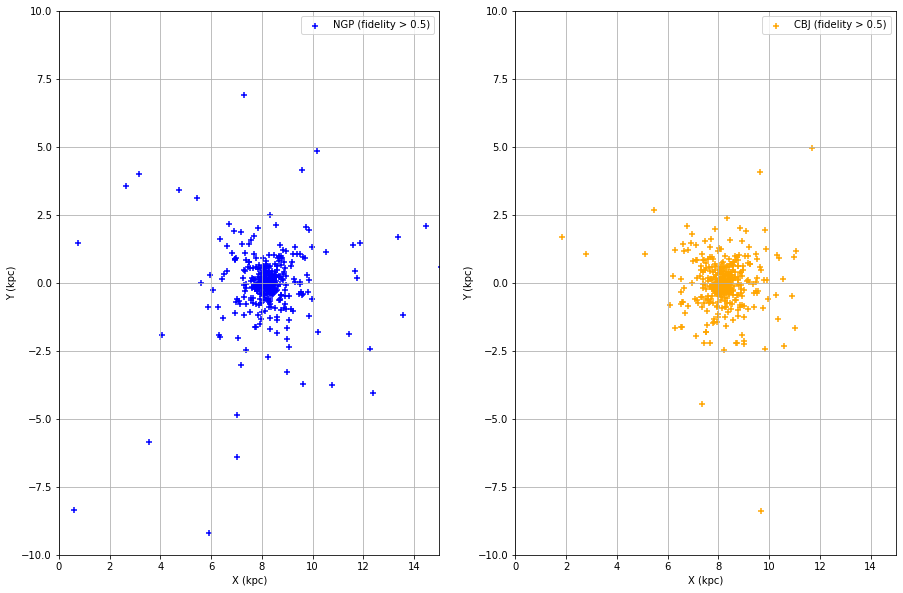

In [32]:
#Spatial distribution 2D with fidelity > 0.5: Y VS X, NGP VS CBJ
plt.figure(1,figsize=(15,10))

plt.subplot(121)
plt.grid()
plt.scatter(X_fid_NGP,Y_fid_NGP,color='blue',marker='+',label='NGP (fidelity > 0.5)')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.legend(loc='upper right')

plt.subplot(122)
plt.grid()
plt.scatter(X_fid_CBJ,Y_fid_CBJ,color='orange',marker='+',label='CBJ (fidelity > 0.5)')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.ylim(-10,10)
plt.xlim(0,15)
plt.legend(loc='upper right')

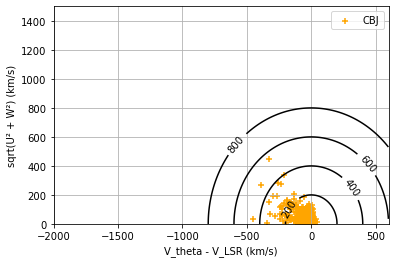

In [33]:
#Toomre diagram with fidelity > 0.5: NGP VS CBJ
plt.grid()
x = np.arange(-2000,600,1)
y = np.arange(-30,1400,1)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
levels = [200.,400.,600.,800.]

Tx_fid_NGP=V_fid_NGP-V_LSR
Ty_fid_NGP=np.sqrt(U_fid_NGP**2+W_fid_NGP**2)
Tx_fid_CBJ=V_geo_fid_CBJ-V_LSR
Ty_fid_CBJ=np.sqrt(U_geo_fid_CBJ**2+W_geo_fid_CBJ**2)


plt.scatter(Tx_fid_CBJ,Ty_fid_CBJ,marker='+',color='orange',label='CBJ')


plt.ylim(0,1500)
plt.xlim(-2000,600)
plt.xlabel('V_theta - V_LSR (km/s)')
plt.ylabel('sqrt(U² + W²) (km/s)')
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.0f', fontsize=10)
plt.legend(loc='best')

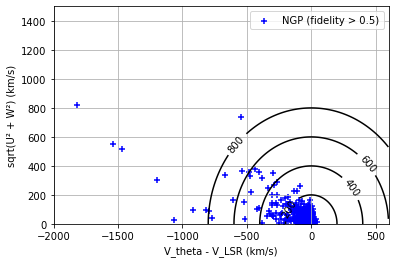

In [34]:
plt.grid()
x = np.arange(-2000,600,1)
y = np.arange(-30,1400,1)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
levels = [200.,400.,600.,800.]
plt.scatter(Tx_fid_NGP,Ty_fid_NGP,marker='+',color='blue',label='NGP (fidelity > 0.5)')
plt.ylim(0,1500)
plt.xlim(-2000,600)
plt.xlabel('V_theta - V_LSR (km/s)')
plt.ylabel('sqrt(U² + W²) (km/s)')
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.0f', fontsize=10)
plt.legend(loc='best')

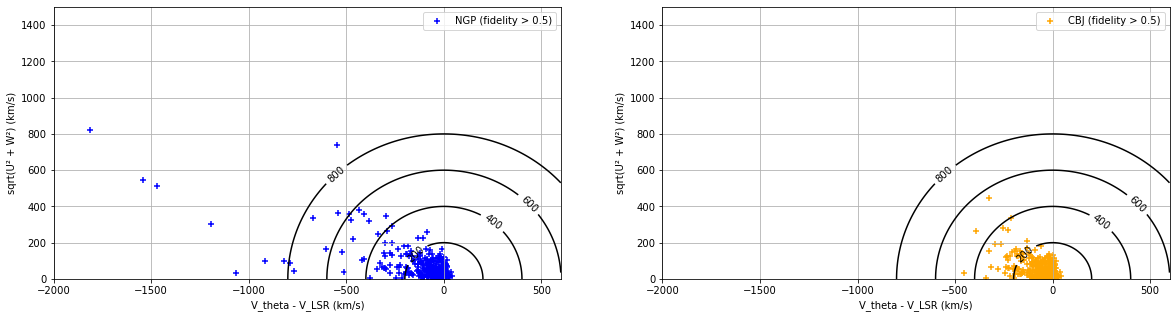

In [56]:
plt.figure(1,figsize=(20,5))
plt.subplot(121)
plt.grid()
plt.scatter(Tx_fid_NGP,Ty_fid_NGP,marker='+',color='blue',label='NGP (fidelity > 0.5)')
plt.ylim(0,1500)
plt.xlim(-2000,600)
plt.xlabel('V_theta - V_LSR (km/s)')
plt.ylabel('sqrt(U² + W²) (km/s)')
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.0f', fontsize=10)
plt.legend(loc='best')

plt.subplot(122)
plt.grid()
x = np.arange(-2000,600,1)
y = np.arange(-30,1400,1)
X, Y = np.meshgrid(x, y)
Z = np.sqrt(X**2 + Y**2)
levels = [200.,400.,600.,800.]
plt.scatter(Tx_fid_CBJ,Ty_fid_CBJ,marker='+',color='orange',label='CBJ (fidelity > 0.5)')
plt.ylim(0,1500)
plt.xlim(-2000,600)
plt.xlabel('V_theta - V_LSR (km/s)')
plt.ylabel('sqrt(U² + W²) (km/s)')
contour = plt.contour(X, Y, Z, levels, colors='k')
plt.clabel(contour, colors = 'k', fmt = '%2.0f', fontsize=10)
plt.legend(loc='best')

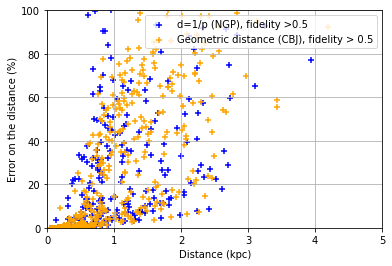

In [35]:
#Error on distances with fidelity > 0.5: NGP original sample vs CBJ
plt.grid()
dist_error_fid_NGP=(plx_error_fid_NGP/(plx_fid_NGP)**2)*100
dist_error_geo_fid_CBJ=((r_hi_fid_geo-r_lo_fid_geo)/2)*100
plt.scatter(dist_fid_NGP,dist_error_fid_NGP,marker='+',color='blue',label='d=1/p (NGP), fidelity >0.5')
plt.scatter(dist_geo_fid_CBJ,dist_error_geo_fid_CBJ,marker='+',color='orange',label='Geometric distance (CBJ), fidelity > 0.5')
plt.ylim(0,100)
plt.xlim(0,5)
plt.xlabel('Distance (kpc)')
plt.ylabel('Error on the distance (%)')
plt.legend(loc='best')